In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 03:49:18 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [10, 20, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=0.0, U=4.5842905730473005
k=1, rel_gap=inf, L=0.0, U=4.5842905730473005
k=2, rel_gap=inf, L=0.0, U=2.637814917742451
k=3, rel_gap=inf, L=0.0, U=1.5253097893211576
k=4, rel_gap=inf, L=0.0, U=0.8812504079305077
k=5, rel_gap=inf, L=0.0, U=0.5086980475355645
k=6, rel_gap=inf, L=0.0, U=0.29278563680520997
k=7, rel_gap=inf, L=0.0, U=0.16789258525300294
k=8, rel_gap=inf, L=0.0, U=0.09598890574973283
k=9, rel_gap=inf, L=0.0, U=0.054706836578790184
k=10, rel_gap=inf, L=0.0, U=0.03117003174704218
k=11, rel_gap=inf, L=0.0, U=0.017815160227201372
k=12, rel_gap=inf, L=0.0, U=0.010136006140164902
k=13, rel_gap=inf, L=0.0, U=0.005744988973556095
k=14, rel_gap=inf, L=0.0, U=0.0032466303776587024
k=15, rel_gap=inf, L=0.0, U=0.0018315509194694627
k=16, rel_gap=inf, L=0.0, U=0.00103193335384551
k=17, rel_gap=inf, L=0.0, U=0.0005811830040983697
k=18, rel_gap=inf, L=0.0, U=0.0003271972433174351
k=19, rel_gap=inf, L=0.0, U=0.00018407516113672087
k=20, rel_gap=inf, L=0.0, U=0.000103542678

# Centralized solution

In [5]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

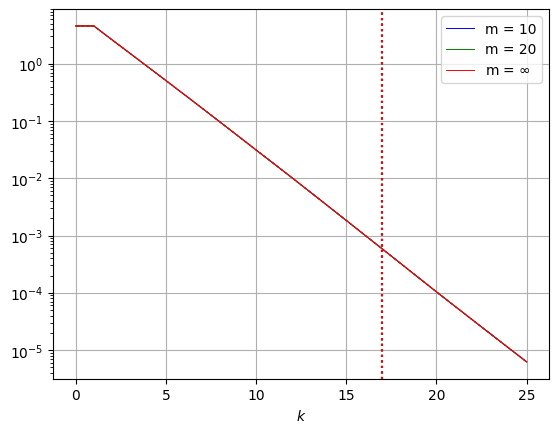

In [6]:
ob.plot_finite_memory_abs(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)